#**Image Segmentation**
---

Fabric defect should be detected using segmentation approach and localize the defect by using the given dataset
for fabric defect detection (unsupervised anomaly detection).


**Dataset:**https://drive.google.com/drive/folders/1XR41OXWprUG58jrAPL7AhafImgOeDCkF?usp=share_link


**User story:**
The user should provide a path of the Fabric image, the program should detect the defect and localize it
and mask the defective region.

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

##Getting Data

In [ ]:
#plotting random images

import os
import random

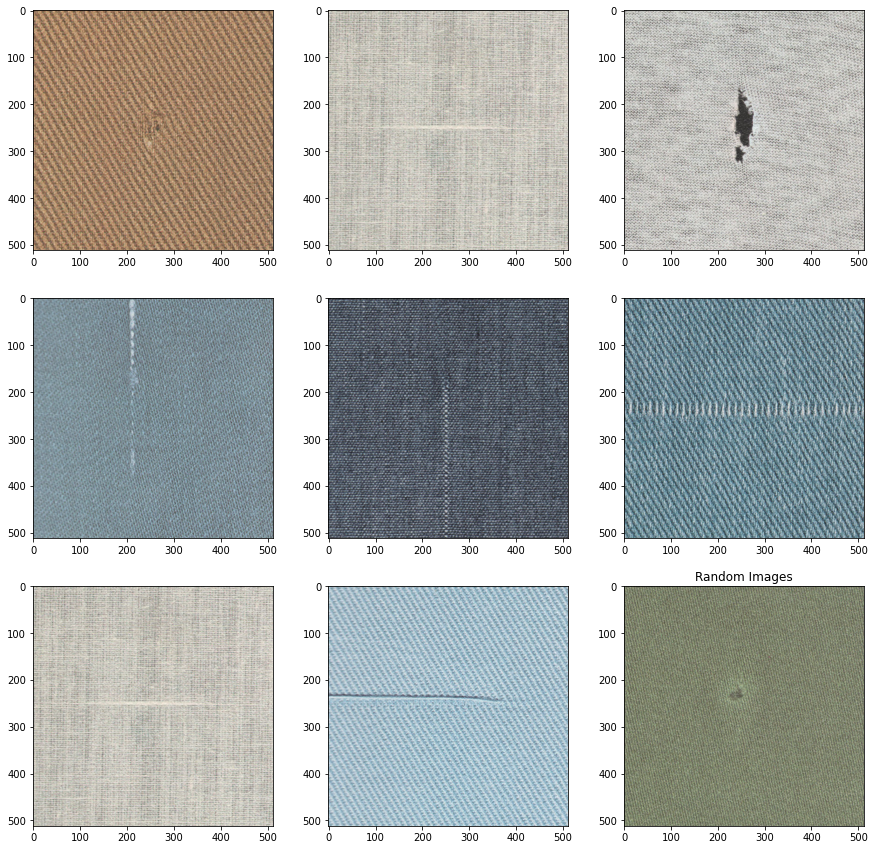

In [ ]:
data_dir = '/content/drive/MyDrive/data/Resolute_AI/Data/Data/Task4'
images = os.listdir(data_dir)

random_images = random.choices(images,k=9)

#plotting random images

fig,([ax0,ax1,ax2],[ax3,ax4,ax5],[ax6,ax7,ax8]) = plt.subplots(nrows=3,ncols=3,figsize=(15,15))

ax = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]

for i in range (len(random_images)):
  ax[i].imshow(plt.imread('/content/drive/MyDrive/data/Resolute_AI/Data/Data/Task4/'+random_images[i]))
  
plt.show()


##Detecting Defect

In [ ]:
def defect_detect(image):
  img = image.copy()

  # converting image from bgr to hsv in order to extract more features from the image 
  hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  h = hsv[:,:,0]
  s = hsv[:,:,1]
  v = hsv[:,:,2]

  #bluring the image
  blr = cv2.blur(v,(10,10))

  # removing the noise or denoising the image 
  dst = cv2.fastNlMeansDenoising(blr,None,10,7,21)

  # Creating a threshold value for segmentation of the image pixels
  _,binary = cv2.threshold(dst,119,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  kernel = np.ones((5,5),np.uint8)

  # erosion of image for extractions of boundary features
  erosion = cv2.erode(binary,kernel,iterations = 2)
  dilation = cv2.dilate(binary,kernel,iterations=2)

  if (dilation==0).sum()>1:
    print('Fabric is Defective')
    ## drawing the contours or curves on the image
    contours,_ = cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    for i in contours:
      if cv2.contourArea(i)< 261258.0:
        cv2.drawContours(img,i,-1,(0,255,0),3)

    # Co-ordinates of the defective region
    l = []
    for c in contours:    
      x,y,w,h = cv2.boundingRect(c)
      center = (x,y)
      l.append(center)


  else:
    print('Fabric is not defective')

  return image,img,l

Fabric is Defective


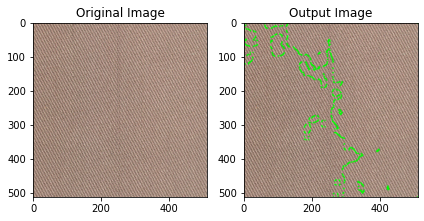

In [ ]:
input_image = cv2.imread('/content/drive/MyDrive/data/Resolute_AI/Data/Data/Task4/Fabric5.jpg')
image,img,cordinates = defect_detect(input_image)

fig,(ax0,ax1) = plt.subplots(1,2)
ax0.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
ax0.set_title('Original Image')

ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ax1.set_title('Output Image')

fig.tight_layout()

In [ ]:
l = os.listdir('/content/drive/MyDrive/data/Resolute_AI/Data/Data/Task4/')


Fabric is Defective


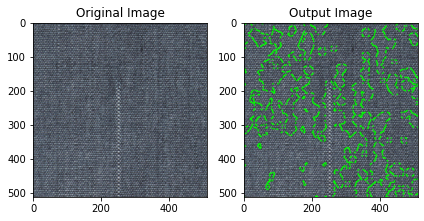

Fabric is Defective


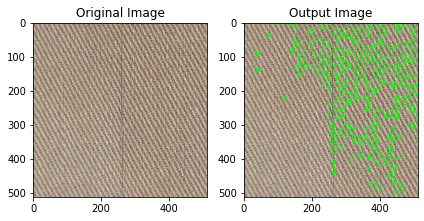

Fabric is Defective


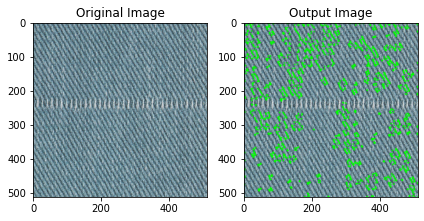

Fabric is Defective


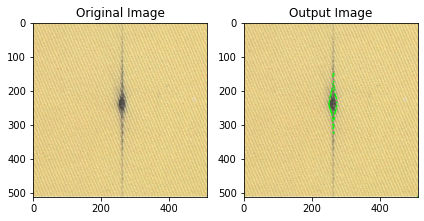

Fabric is Defective


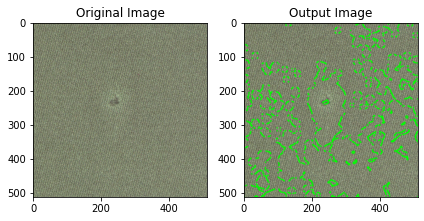

Fabric is Defective


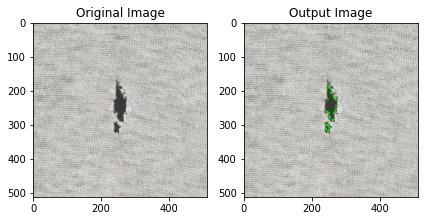

Fabric is Defective


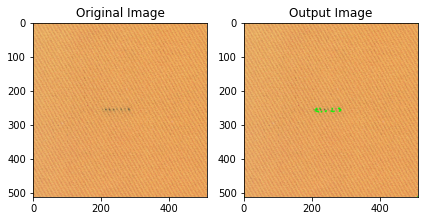

Fabric is Defective


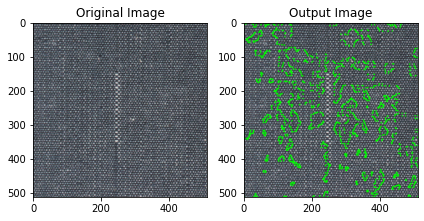

Fabric is Defective


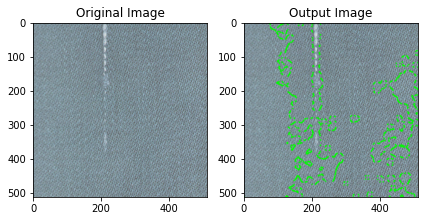

Fabric is Defective


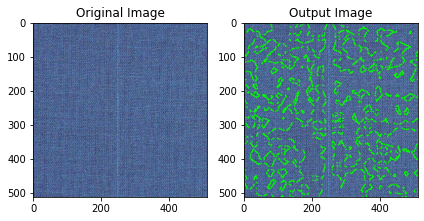

Fabric is Defective


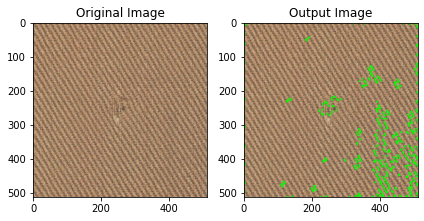

Fabric is Defective


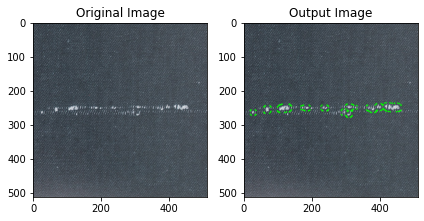

Fabric is Defective


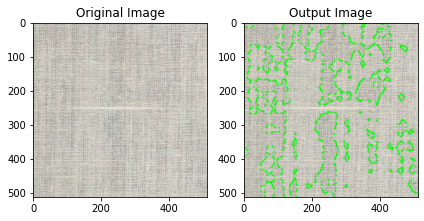

Fabric is Defective


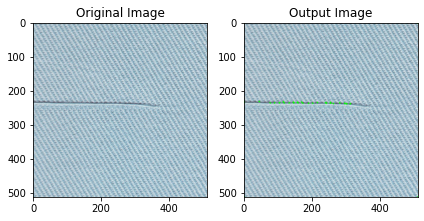

Fabric is Defective


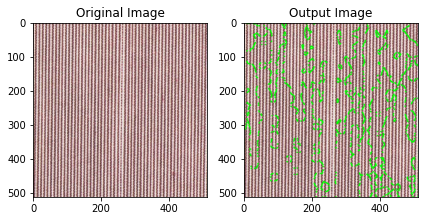

Fabric is Defective


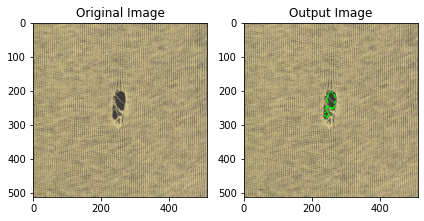

Fabric is Defective


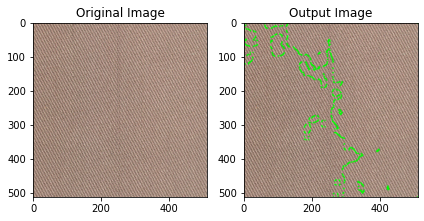

Fabric is Defective


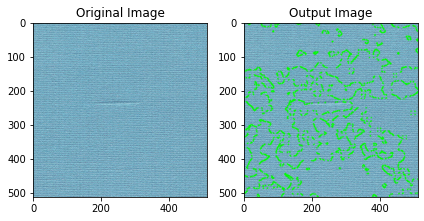

Fabric is Defective


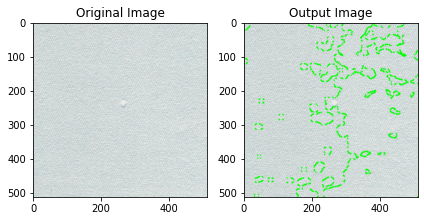

In [ ]:
for i in l:
  input_image = cv2.imread('/content/drive/MyDrive/data/Resolute_AI/Data/Data/Task4/'+i)
  image,img,cordinates = defect_detect(input_image)

  fig,(ax0,ax1) = plt.subplots(1,2)
  ax0.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  ax0.set_title('Original Image')

  ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  ax1.set_title('Output Image')

  fig.tight_layout()
  plt.show()


##Prediction

In [ ]:
# creating a function for prediction of the defect in fabric image 
def prediction (image_path):
  input_image = cv2.imread(image_path)
  image,img,cordinates = defect_detect(input_image)

  fig,(ax0,ax1) = plt.subplots(1,2)
  ax0.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  ax0.set_title('Original Image')

  ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  ax1.set_title('Output Image')

  fig.tight_layout()
  print('Co-ordinates of the defective region')
  print(cordinates)

Fabric is Defective
Co-ordinates of the defective region
[(0, 0), (242, 298), (242, 185)]


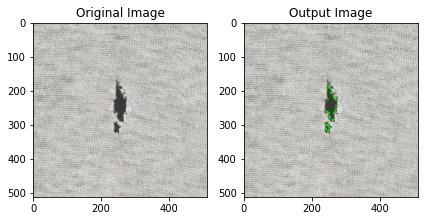

In [ ]:
prediction('/content/drive/MyDrive/data/Resolute_AI/Data/Data/Task4/Fabric22.jpg')

Fabric is Defective
Co-ordinates of the defective region
[(0, 0), (209, 250)]


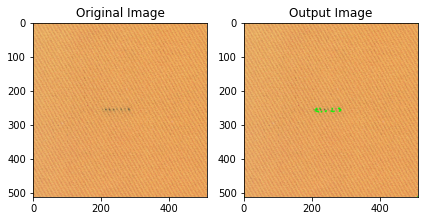

In [ ]:
prediction('/content/drive/MyDrive/data/Resolute_AI/Data/Data/Task4/Fabric21.jpg')

Fabric is Defective
Co-ordinates of the defective region
[(0, 0), (242, 298), (242, 185)]


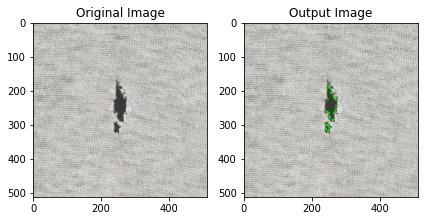

In [ ]:
prediction('/content/drive/MyDrive/data/Resolute_AI/Data/Data/Task4/Fabric22.jpg')